In [16]:
# Parâmetros
set.seed(131)
mu <- 38.7
sigma <- 4
n <- 45
m <- 300
mu_0 <- 37.5
alpha <- 0.02

In [17]:
# Gerar m amostras de tamanho n
samples <- replicate(m, rnorm(n, mean=mu, sd=sigma))

# Função para realizar o teste de hipóteses
perform_test <- function(sample) {
  z <- (mean(sample) - mu_0) / (sigma / sqrt(n))
  p_value <- 2 * (1 - pnorm(abs(z)))
  return(p_value > alpha)
}

In [18]:
# Aplicar o teste de hipóteses para cada amostra
results <- apply(samples, 2, perform_test)

# Estimar a probabilidade de não rejeitar H0
non_rejection_prob <- mean(results)

# Mostrar o resultado com 3 casas decimais
round(non_rejection_prob, 3)

[1] 0.613

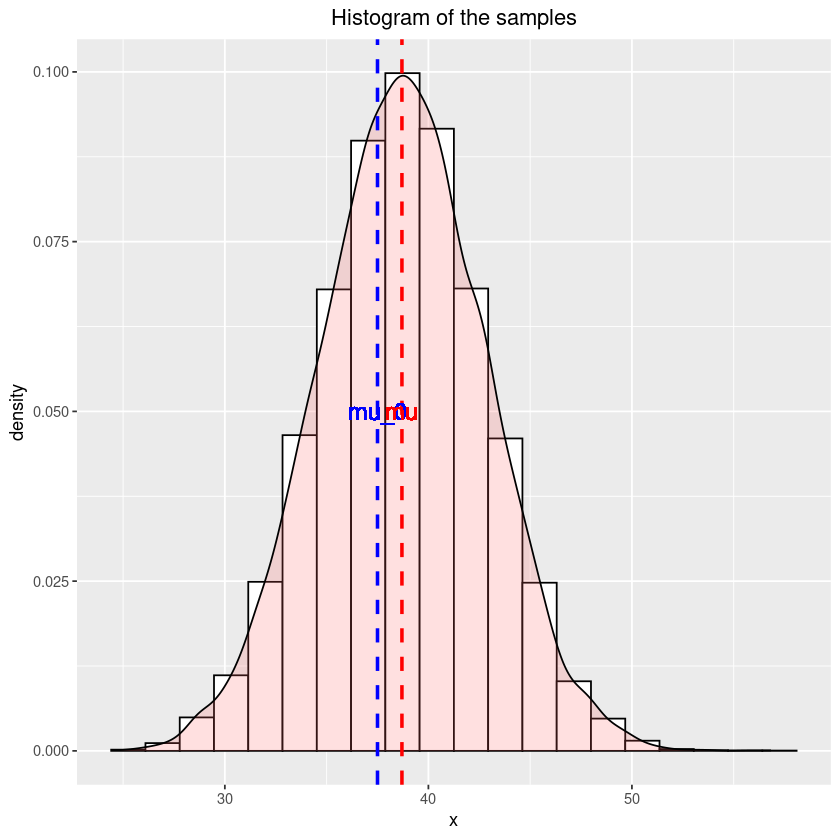

In [19]:
library(ggplot2)

# plot the histogram with the gaussian curve

df <- data.frame(x = c(samples), y = rep(0, n*m))


ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = ..density..), bins = 20, colour = "black", fill = "white") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  geom_vline(xintercept = mu_0, colour = "blue", linetype = "dashed", size = 1) +
  geom_vline(xintercept = mu, colour = "red", linetype = "dashed", size = 1) +
  #geom_vline(xintercept = mean(df$x), colour = "green", linetype = "dashed", size = 1) +
  geom_text(aes(x = mu_0, y = 0.05, label = "mu_0"), colour = "blue", size = 5) +
  geom_text(aes(x = mu, y = 0.05, label = "mu"), colour = "red", size = 5) +
  #geom_text(aes(x = mean(df$x), y = 0.05, label = "mean"), colour = "green", size = 5) +
  ggtitle("Histogram of the samples") +
  xlab("x") +
  ylab("density") +
  theme(plot.title = element_text(hjust = 0.5))
